# Roll No 55

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

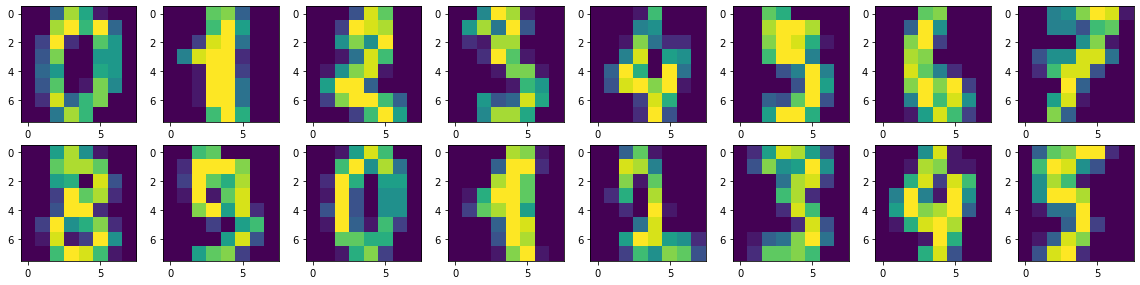

In [7]:
main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(16):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [8]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()

### Splitting train test 65-35%

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.35, random_state = 55) 

In [10]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.8537360890302067


In [11]:
main_data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

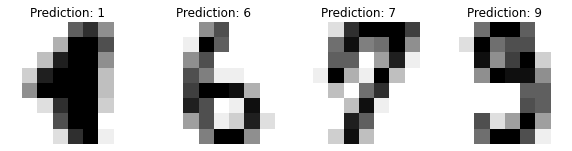

In [12]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [13]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.82      0.85      0.84        54
           2       0.87      0.61      0.72        67
           3       0.88      0.80      0.84        65
           4       0.89      0.92      0.90        61
           5       0.89      0.94      0.91        62
           6       1.00      0.98      0.99        64
           7       0.79      0.99      0.87        71
           8       0.58      0.82      0.68        55
           9       0.98      0.69      0.81        74

    accuracy                           0.85       629
   macro avg       0.87      0.86      0.85       629
weighted avg       0.87      0.85      0.85       629




Confusion matrix:
[[55  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  2  0  0  1  5  0]
 [ 0  4 41  2  0  0  0  0 20  0]
 [ 0  1  2 52  0  4  0  3  2  1]
 [ 1  1  2  0 56  0  0  1  0  0]
 [ 0  0  0  0  2 58  0  1  1  0]
 [ 0  0  0  0  1  0 63  0  0  0]
 [ 0  0  0  0  1  0  0 70  0  0]
 [ 0  1  2  2  0  0  0  5 45  0]
 [ 1  3  0  3  0  3  0  8  5 51]]


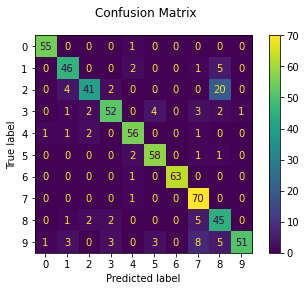

In [14]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()